# PPO Train and Test experiment

This experiment shows the test rewards retrieved during training for different couples of test and train environments

### Imports and configurations

In [1]:
from PPO.ppo_test import train_and_test_policy

target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

optimized_clip_range_target = 0.11258122567530965
optimized_clip_range_source = 0.219204216258128

### Run train and test

In [ ]:
print("Start experiments: ")

print('\nsource->source')
train_and_test_policy(
    train_env=source_env,
    test_env=source_env,
    output_folder="./PPO_output/source-source/",
    clip_range=optimized_clip_range_source,
    episodes=8000
)

print('\ntarget->target')
train_and_test_policy(
    train_env=target_env,
    test_env=target_env,
    output_folder="./PPO_output/target-target/",
    clip_range=optimized_clip_range_target,
    episodes=8000
)

print('\nsource->target')
train_and_test_policy(
    train_env=source_env,
    test_env=target_env,
    output_folder="./PPO_output/source-target/",
    clip_range=optimized_clip_range_source,
    episodes=80
)

Start experiments: 
source->source


/opt/miniconda3/envs/mldl_m4/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean episode length
356.4632407544928
mean train reward
1233.2664053031183
mean test reward
1360.995273728615
test rewards file: ./PPO_output/source-source//test_rewards_CustomHopper-source-v0.txt
target->target
mean episode length
332.25
mean train reward
1183.7869639657242
mean test reward
1373.846454281215
test rewards file: ./PPO_output/target-target//test_rewards_CustomHopper-target-v0.txt
source->target
mean episode length
356.4632407544928
mean train reward
1233.2664053031183
mean test reward
1070.7259031227627
test rewards file: ./PPO_output/source-target//test_rewards_CustomHopper-target-v0.txt


### Plot test rewards for each couple of environments

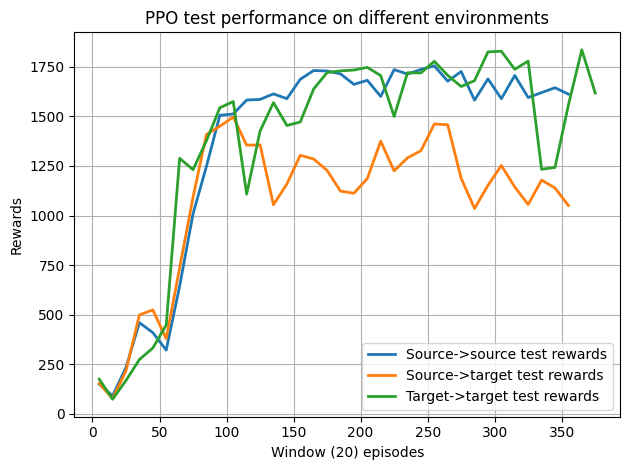

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def get_rewards (filename, window_size: int = 10):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = [float(line.strip()) for line in lines]

        means = []
        positions = []
        for i in range(0, len(data), window_size):
            window = data[i:i+window_size]
            mean_value = np.mean(window)
            means.append(mean_value)
            positions.append(i + window_size//2)
        
        return means, positions
    
path_test_resources = './trained-models/ppo/train-test-experiment'

t_t_test_rewards, tt_positions = get_rewards(f'{path_test_resources}/target-target/test_rewards_CustomHopper-target-v0.txt')
s_t_test_rewards, st_positions = get_rewards(f'{path_test_resources}/source-target/test_rewards_CustomHopper-target-v0.txt')
s_s_test_rewards, ss_positions = get_rewards(f'{path_test_resources}/source-source/test_rewards_CustomHopper-source-v0.txt')

plt.plot(ss_positions, s_s_test_rewards, label=f'Source->source test rewards', linewidth=2)
plt.plot(st_positions, s_t_test_rewards, label=f'Source->target test rewards', linewidth=2)
plt.plot(tt_positions, t_t_test_rewards, label=f'Target->target test rewards', linewidth=2)

plt.ylabel("Rewards")
plt.xlabel(f"Window ({20}) episodes")
plt.title("PPO test performance on different environments")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
